# Rate of Change
> Given a function f(x) plotted in the Cartesian plane as y=f(x), the average rate of change (or average rate of change function) of f from x to a is given by [$^1$](http://mathworld.wolfram.com/AverageRateofChange.html)  

$$A(x, a) = \frac{f(x) - f(a)}{x - a} $$

- $A$ name of the average rate of change function
- $x - a$ represents the change of the input of the function f
- $f(x) - f(a)$ represents the change in the function f as the input changes from $a$ to $x$

> This corresponds the the slope of the secant line connecting the points $(x,f(x))$ and $(a,f(a))$.[$^1$](http://mathworld.wolfram.com/AverageRateofChange.html)

- The rate of change - ROC - is the speed at which a variable changes over a specific period of time. ROC is often used when speaking about momentum, and it can generally be expressed as a ratio between a change in one variable relative to a corresponding change in another; graphically, the rate of change is represented by the slope of a line. The ROC is often illustrated by the Greek letter delta.[$^2$](https://www.investopedia.com/terms/r/rateofchange.asp)

- The Average Rate of Change function describes the average rate at which one quanity is changing with respect to something else changing. In general, an average rate a change function is a process that calculates the the amount of change in one item divided by the corresponding amount of change in another. Using function notation, we can define the Average rate of Change of a function f from a to x as[$^3$](https://www.mesacc.edu/~marfv02121/readings/average/)

- The rate of change in linear equation does not vary(straight line) while the opposite is true for non-linear.

Problem 1: $g(x) = x^3 -9x$<br><br>
Problem 2: Find the average rate of change of $f(x) = \frac{1}{3} x^2 - 4$ from 3 to 0 or [0, 3].


--------

1. "Average Rate of Change," From Wolfram MathWorld, , accessed April 28, 2019, http://mathworld.wolfram.com/AverageRateofChange.html.

2. James Chen, "Rate of Change (ROC)," Investopedia, April 08, 2019, , accessed April 30, 2019, https://www.investopedia.com/terms/r/rateofchange.asp.

3. "Average Rate of Change Function Instructor: Dr. Jo Steig," College Algebra - Average Rate of Change Function, , accessed April 30, 2019, https://www.mesacc.edu/~marfv02121/readings/average/.


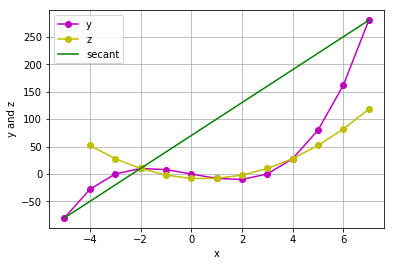

    x    y      z
0  -5  -80    NaN
1  -4  -28   52.0
2  -3    0   28.0
3  -2   10   10.0
4  -1    8   -2.0
5   0    0   -8.0
6   1   -8   -8.0
7   2  -10   -2.0
8   3    0   10.0
9   4   28   28.0
10  5   80   52.0
11  6  162   82.0
12  7  280  118.0


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import csv

#g(x) = x^3 - 9x

def g(x):
    return x**3 -9*x


#Recursive function
def factorial(x):
    if x == 1:
        return 1
    else:
        return(x * (factorial(x -1)))


#file = open('data.csv', mode='w')
#writer = csv.writer(file, delimiter="|", quotechar='"', quoting=csv.QUOTE_MINIMAL)
#writer.writerow([' x ', ' factorial(x) '])
#for i in range(-5, 5):
    #y = g(i)
    #writer.writerow([i, y])
    
#file.close()

#df = pd.read_csv('data.csv')
#df


df = pd.DataFrame({'x': range(-5, 8)})
#df['y'] = df['x']**3 -9*df['x']
df['y'] = g(df['x'])
#Get rate of change with diff()
df['z'] = df['y'].diff()
#x = np.array(range(-5, 8))

# Create an array for the secant line
secant = np.array([-5,7])

%matplotlib inline
#plt.plot(x, y, color='m', marker='o')
plt.plot(df.x, df.y, color='m', marker='o')
plt.plot(df.x, df.z, color='y', marker='o')
plt.plot(secant, g(secant), color='g')
plt.xlabel('x')
plt.ylabel('y')
#Find the slope
m, b = np.polyfit(df.x, df.y, 1)
#m, b = np.polyfit(x, g(x), 1)
plt.xlabel('x')
plt.ylabel('y and z')
plt.legend(['y', 'z', 'secant'])
plt.xticks()
plt.yticks()
plt.grid()
plt.show()
print(df)


#Changes in rate %
g_series = pd.Series(g(df.x))
percent = g_series.pct_change()
change = percent * 100
#change


In [2]:
m

19.0

In [3]:
b

15.000000000000004

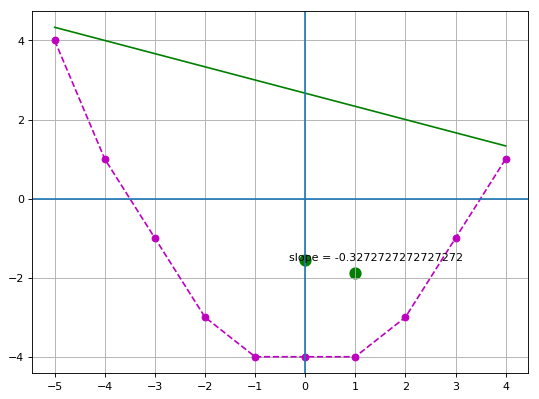

In [4]:
#Problem 2: f(x) = 1/3x^2 - 4

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import xticks, yticks

import sympy
from sympy import symbols, Subs
import pandas as pd

def f(x):
    return (1/3) * x**2 - 4

df = pd.DataFrame({'x': range(-5, 5)})
df['y'] = round(f(df['x']))

#df['z'] == rate of change
df['z'] = df['y'].diff()
secant = np.array([-5,4])


slope, yInt = np.polyfit(df.x, df.y, 1) 


%matplotlib inline
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.x, df.y, '--m', marker='o')
plt.plot(secant, f(secant), 'g')
plt.axhline()
plt.axvline()
plt.xticks(df.x)
plt.yticks()
plt.grid()

# plot the slope from the y-intercept for 1x
mx = [0, 1]
my = [yInt, yInt + slope]
plt.scatter(mx,my, color='g', lw=5)
plt.annotate('slope = ' + str(slope), (slope, yInt))

plt.show()

In [5]:

df

,x,y,z
0,-5,4.0,NaN
1,-4,1.0,-3.0
2,-3,-1.0,-2.0
3,-2,-3.0,-2.0
4,-1,-4.0,-1.0
5,0,-4.0,0.0
6,1,-4.0,0.0
7,2,-3.0,1.0
8,3,-1.0,2.0
9,4,1.0,2.0
